In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from  sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [8]:
data = pd.read_csv('data/NTO_exp_encoded.csv')
data

,blend_id,component_name,mass_fraction,component_type_title,component_param_title,component_param_value,oil_property_value
0,c090b033-87c0-4342-b737-fa7289b6f976,3a03d432-d849-417d-92e7-9a604187a096,67.00,5360a311-e081-4972-9215-26b5d9072f65,8682d4cc-c352-422b-a197-c05427cd518e,NaN,4.52
1,c090b033-87c0-4342-b737-fa7289b6f976,c33ebc5c-0935-4c6b-a489-f1404f88be22,33.00,5360a311-e081-4972-9215-26b5d9072f65,Температура вспышки в закрытом тигле,NaN,4.52
2,c090b033-87c0-4342-b737-fa7289b6f976,3a03d432-d849-417d-92e7-9a604187a096,67.00,5360a311-e081-4972-9215-26b5d9072f65,9a0b87b0-ded9-49c8-bad4-476ce3ee8893,NaN,4.52
3,c090b033-87c0-4342-b737-fa7289b6f976,3a03d432-d849-417d-92e7-9a604187a096,67.00,5360a311-e081-4972-9215-26b5d9072f65,a2fc0f17-7e63-4ad2-8022-da4162abee53,1612.0,4.52
4,c090b033-87c0-4342-b737-fa7289b6f976,c33ebc5c-0935-4c6b-a489-f1404f88be22,33.00,5360a311-e081-4972-9215-26b5d9072f65,a2fc0f17-7e63-4ad2-8022-da4162abee53,2360.0,4.52
...,...,...,...,...,...,...,...
101855,3826f353-92cb-4759-9625-8de04fd31f92,0962b43d-14b3-4bc5-b7b4-34500629ff48,49.69,2b8465f2-f5e2-4d0a-b468-52ec4467def1,b8039e27-bfc7-43b6-9954-3fe2804524d7,NaN,10.09
101856,3826f353-92cb-4759-9625-8de04fd31f92,7bc3fcf4-7f3f-4ff6-9bdd-a62fc39828d3,19.80,3c132c45-5aea-4626-8a81-becbb02b10b0,b8039e27-bfc7-43b6-9954-3fe2804524d7,NaN,10.09
101857,3826f353-92cb-4759-9625-8de04fd31f92,6b4f217d-2c74-4b84-ae57-7e6f79a6d6ad,29.70,3c132c45-5aea-4626-8a81-becbb02b10b0,b8039e27-bfc7-43b6-9954-3fe2804524d7,3600.0,10.09
101858,3826f353-92cb-4759-9625-8de04fd31f92,6b4f217d-2c74-4b84-ae57-7e6f79a6d6ad,29.70,3c132c45-5aea-4626-8a81-becbb02b10b0,c2fea5f1-695f-4822-a94c-bd73d609e439,NaN,10.09


In [9]:
data.fillna(0, inplace=True)
data.isna()

,blend_id,component_name,mass_fraction,component_type_title,component_param_title,component_param_value,oil_property_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
101855,False,False,False,False,False,False,False
101856,False,False,False,False,False,False,False
101857,False,False,False,False,False,False,False
101858,False,False,False,False,False,False,False


In [11]:
label_encoders = {}
categorical_columns = [
    'blend_id', 'component_name', 
    'component_type_title', 'component_param_title'
    ]
one_hot = {}

In [5]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [6]:
data

,blend_id,component_name,mass_fraction,component_type_title,component_param_title,component_param_value,oil_property_value
0,418,12,67.00,6,28,0.0,4.52
1,418,34,33.00,6,53,0.0,4.52
2,418,12,67.00,6,33,0.0,4.52
3,418,12,67.00,6,36,1612.0,4.52
4,418,34,33.00,6,36,2360.0,4.52
...,...,...,...,...,...,...,...
101855,118,1,49.69,3,38,0.0,10.09
101856,118,22,19.80,4,38,0.0,10.09
101857,118,16,29.70,4,38,3600.0,10.09
101858,118,16,29.70,4,39,0.0,10.09


In [50]:
X = data.drop(columns=['oil_property_value']).values
y = data['oil_property_value'].values

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, random_state=42
    )

In [53]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [54]:
class PredictorOil(nn.Module):
    def __init__(self, input_dim):
        super(PredictorOil, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1) 
        )
    
    def forward(self, x):
        return self.layers(x)

In [55]:
input_dim = X_train.shape[1]
model = PredictorOil(input_dim)

In [61]:
criterion = nn.L1Loss()  
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [62]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

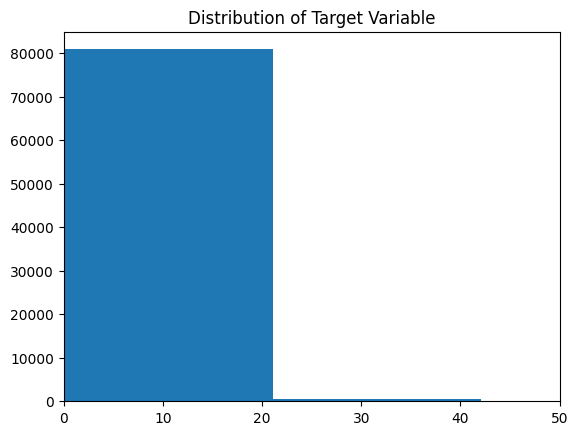

In [71]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=50)
plt.title("Distribution of Target Variable")
plt.xlim(0, 50)
plt.show()

In [64]:
num_epochs = 100
batch_size = 64

In [65]:
for epoch in tqdm(range(num_epochs)):
    indices = torch.randperm(X_train_tensor.size(0))
    X_train_shuffled = X_train_tensor[indices]
    y_train_shuffled = y_train_tensor[indices]
    
    for i in range(0, X_train_tensor.size(0), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

 10%|█         | 10/100 [00:03<00:30,  2.97it/s]

Epoch [10/100], Loss: 1.1988


 20%|██        | 20/100 [00:06<00:26,  3.01it/s]

Epoch [20/100], Loss: 0.4027


 30%|███       | 30/100 [00:10<00:23,  3.01it/s]

Epoch [30/100], Loss: 1.4456


 40%|████      | 40/100 [00:13<00:20,  3.00it/s]

Epoch [40/100], Loss: 0.4669


 50%|█████     | 50/100 [00:16<00:17,  2.93it/s]

Epoch [50/100], Loss: 0.7651


 60%|██████    | 60/100 [00:20<00:13,  2.98it/s]

Epoch [60/100], Loss: 0.4571


 70%|███████   | 70/100 [00:23<00:10,  2.92it/s]

Epoch [70/100], Loss: 0.6682


 80%|████████  | 80/100 [00:26<00:06,  3.00it/s]

Epoch [80/100], Loss: 0.6836


 90%|█████████ | 90/100 [00:30<00:03,  3.00it/s]

Epoch [90/100], Loss: 0.6486


100%|██████████| 100/100 [00:33<00:00,  2.97it/s]

Epoch [100/100], Loss: 0.5142


In [66]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f"MAE: {test_loss.item():.4f}")

MAE: 0.5991


In [67]:
predictions_np = predictions.numpy().flatten()
actual_values = y_test_tensor.numpy().flatten()

In [68]:
print("Predicted oil_property_values:", predictions_np[:5])
print("Actual oil_property_values:", actual_values[:5])

Predicted oil_property_values: [5.655973  5.902134  7.338442  6.9619627 6.680094 ]
Actual oil_property_values: [5.696 5.965 5.965 6.92  6.933]
